# Machine Learning with Scikit-Learn

Scikit-Learn is a machine learning Python library which provides a large amount of machine learning algorithms. All machine learning models are implemented as Python classes. It makes easy to train models and switch between different algorithms. 

Before fitting a model with sckit-learn, our data has to be in a recognizable format. Sckit-Learn works well with NumPy arrays.There we will convert Pandas DataFrames to NumPy arrays.

Sckit-Learn expects Features matrix and Target vector. In 2D Features matrix, rows represent samples and columns represent features. Target vector is usually 1D vector and represent labels. 

First we need to import sckit-learn library to start working with it. Then we will import the boston dataset which comes with the scikit-learn library. 

In [1]:
#!pip install -U scikit-learn

import sklearn
from sklearn.datasets import load_boston

import pandas as pd

In [2]:
data = load_boston() # load boston house price dataset
df = pd.DataFrame(data.data, columns=data.feature_names) # convert dataset to Pandas DataFrame
df['target'] = data.target # arrange target vector
df.head() # look at the first 5 observations of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now, we will arrange the features matrix. We will take all columns except target column.

In [3]:
features = df.loc[:, df.columns[0:-1]].values  # Converting to NumPy array with values attribute
features.shape  # confirm it is 2D array

(506, 13)

In [4]:
targets = df.loc[:, 'target'].values  # Convert prices/target column to NumPy array
targets.shape  # it is 1D in this case

(506,)

Now, our data is ready to work with sckit-learn library. 

### Linear Regression using Scikit-Learn

   Linear regression is used to predict a continuous value. Let's create a linear regression model for the boston house prices dataset using sckit-learn. First, we will import the necessary libraries:

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Then we will split our dataset into two pieces: training set and test set. The ratio can be 80% for training and %20 for test. 

In [6]:
features_train, features_test, targets_train, targets_test \
= train_test_split(features,targets,random_state = 3)

In [7]:
reg = LinearRegression(fit_intercept=True)  # create a LinearRegression instance

reg.fit(features_train,targets_train)  # train the model on the training set

score = reg.score(features_test, targets_test)  # print the score acc. to test set
print(score)

0.7668895327325096


### Logistic Regression using Scikit-Learn

Logistic regression is a model used for classification. Let's create Logistic regression model for the iris dataset. 

In [8]:
from sklearn.datasets import load_iris  
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler

In [9]:
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

iris_ftr = iris_df.loc[:, iris_df.columns[0:-1]].values  # take all columns except species(target), iris_df[iris_data.feature_names] would also work
iris_tar = iris_df.loc[:, iris_df.columns[-1]].values  # take only last(target) column, iris_df['species'] would also work


iris_ftr_train, iris_ftr_test, iris_tar_train, iris_tar_test \
= train_test_split(iris_ftr,iris_tar, random_state = 0)

Logistic regression is affected by scale, therefore, we need to scale our features in the data onto unit scale before using Logistic regression for optimal performance. Unit scale means having Gaussian with zero mean (mean=0) and unit variance (variance=1). We will use scikit-learn's _**StandardScaler**_ to standardize the features.   

In [10]:
scaler = StandardScaler()
scaler.fit(iris_ftr_train)  # fit on training set only

iris_ftr_train_st = scaler.transform(iris_ftr_train) # apply transform to the training set
iris_ftr_test_st = scaler.transform(iris_ftr_test) # apply transform to the test set

In [11]:
clf = LogisticRegression()

clf.fit(iris_ftr_train_st, iris_tar_train)  # train the model

acc = clf.score(iris_ftr_test_st, iris_tar_test)  # print the accuracy acc. to test set: correct predictions/total number of data points
print(acc)

0.9736842105263158


Logistic regression allows us to see prediction probabilities as well as a prediction. So, it gives us probabilities. 

In [12]:
iris_ftr_test_st[0].reshape(1,-1)  # features of one observation after standardization

array([[-0.09984503, -0.57982483,  0.72717965,  1.51271377]])

In [13]:
print('prediction:', clf.predict(iris_ftr_test_st[0].reshape(1,-1))[0])  # predictions for one sample
print('probabilities:',clf.predict_proba(iris_ftr_test_st[0].reshape(1,-1)))  # probabilities of the prediction

prediction: 2
probabilities: [[1.44000190e-04 3.10229631e-02 9.68833037e-01]]


We can see the prediction and probabilities for that prediction using the line above. We have three classes: 0, 1 and 2. The class of first observation in the test set is 2 and our model predicts 2 with 96.8% probability.  

We can also look at the confusion matrix. It gives much insight into what was wrong. 

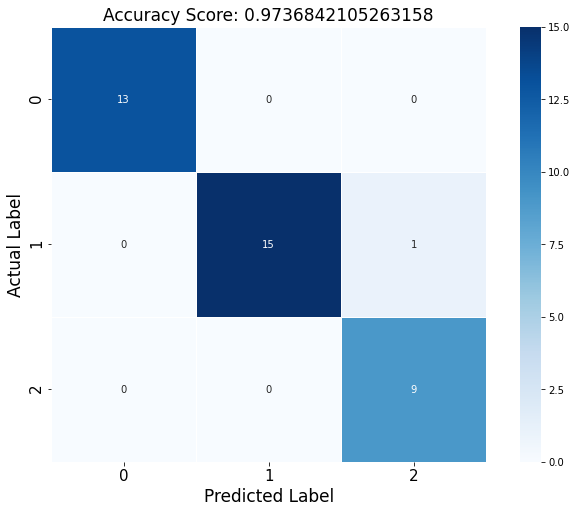

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

cfsmat = metrics.confusion_matrix(iris_tar_test, clf.predict(iris_ftr_test_st))

plt.figure(figsize=(12,8))
sns.heatmap(cfsmat, annot=True,
           fmt='.0f',
           linewidths = .5,
           square = True,
           cmap = 'Blues');

plt.ylabel('Actual Label', fontsize=17);
plt.xlabel('Predicted Label', fontsize=17);
plt.title('Accuracy Score: {}'.format(acc), size=17);
plt.tick_params(labelsize=15)

We have 38 samples with corresponding labels in our test set. According to heat map, we can see that predicted labels and actual labels are mostly matched, we have only 1 missclassification. 

### Decision trees using Scikit-learn

Let's make classification for iris dataset using decision trees. First, we need to import DecisionTreeClassifier from scikit-learn library. 

In [15]:
from sklearn.tree import DecisionTreeClassifier

For the Decision Tree algorithm, we don't need to standardize our features unlike Logistic regression or k-nearest neighbours. That's why we can use our splits directly without standardization.

In [16]:
clf_tree = DecisionTreeClassifier(max_depth = 2, random_state = 0)  # hyperparameter tuning

clf_tree.fit(iris_ftr_train, iris_tar_train)
    
clf_tree.predict(iris_ftr_test[0].reshape(1,-1))

array([2])

In [17]:
score_tree = clf_tree.score(iris_ftr_test, iris_tar_test) 
print(score_tree)

0.8947368421052632


We can find the optimal max_length by performing grid search. 

In [18]:
max_depth_range = list(range(1,6))

accuracy_tree = []

for depth in max_depth_range:
    clf_tree_opt = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf_tree_opt.fit(iris_ftr_train, iris_tar_train)
    
    scores_tree = clf_tree_opt.score(iris_ftr_test, iris_tar_test)*100
    accuracy_tree.append(scores_tree) 
    print('max_depth {:d} gives {:.2f} % accuracy'.format(depth, scores_tree))
    
print('best max_depth is:', accuracy_tree.index(max(accuracy_tree)) + 1)

max_depth 1 gives 57.89 % accuracy
max_depth 2 gives 89.47 % accuracy
max_depth 3 gives 97.37 % accuracy
max_depth 4 gives 97.37 % accuracy
max_depth 5 gives 97.37 % accuracy
best max_depth is: 3


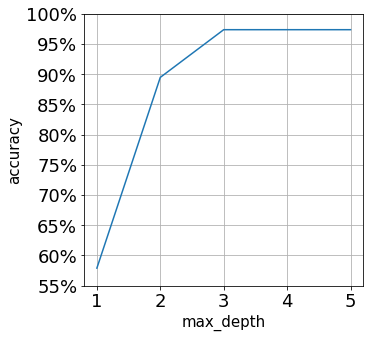

In [19]:
plt.figure(figsize=(5,5))
graph = plt.plot(max_depth_range, accuracy_tree);

# next three lines are just for adding % symbol to the y labels
loc, labels = plt.yticks();
new_labels = ['{}%'.format(int(tick)) for tick in loc];
plt.yticks(loc, new_labels);

plt.xlabel('max_depth', fontsize=15);
plt.ylabel('accuracy', fontsize=15);
plt.tick_params(labelsize=18)
plt.grid()

We can also visualize the decision tree using Matplotlib:

In [20]:
from sklearn import tree

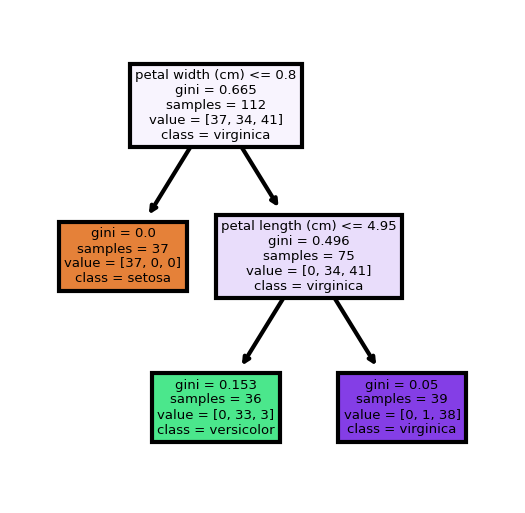

In [21]:
feature_names = iris_data.feature_names
class_names = iris_data.target_names

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(2,2), dpi=300)

tree.plot_tree(clf_tree,
              feature_names = feature_names,
              class_names = class_names,
              filled = True);

fig.savefig('Decision Tree for Iris Dataset.png')

### Bagged trees using Sckit-learn

Decision trees are prone to overfit on training set. We can constraint how large a tree can grow to mitigate this problem. Bagged trees try to overcome this problem by using bootstrapped data to grow multiple deep decision trees. Multiple decision trees come together to make a combined prediction. 

In [22]:
from sklearn.ensemble import BaggingRegressor

reg_bag = BaggingRegressor(n_estimators=100, random_state=0)

reg_bag.fit(iris_ftr_train, iris_tar_train)
    
reg_bag.predict(iris_ftr_test[0].reshape(1,-1))

array([2.])

In [23]:
score_bag = reg_bag.score(iris_ftr_test, iris_tar_test) 
print(score_bag)

0.9594651219512195


We can tune n_estimators parameter by looking the combinations of it. 

In [24]:
parameters_range = list(range(30,150,10))

scores_bag_dic = {}

for parameter in parameters_range:
    reg_bag_op = BaggingRegressor(n_estimators=parameter, random_state=0)   
    reg_bag_op.fit(iris_ftr_train, iris_tar_train)
    score_bag_op = reg_bag_op.score(iris_ftr_test, iris_tar_test)*100 
    
    scores_bag_dic[parameter] = score_bag_op
    
print('\nThe best n_estimators value is:{0} with the score {1}'\
      .format(max(scores_bag_dic, key=scores_bag_dic.get), max(scores_bag_dic.values())))    


The best n_estimators value is:50 with the score 96.15551219512196


### Unsupervised Learning

In machine learning, we don't always try to predict a value. Sometimes we try to find some structure in the dataset. This is called Unsupervised Learning, which doesn't require labels/targets. Therefore, in the context of scikit-learn, we provide only features matrix when we fit our algorithm unlike supervised learning. Unsupervised algorithms don't make predictions from the data. 

There are two common types of unsupervised learning: Clustering and Dimensionality Reduction.

Clustering is often used to discover groupings in a dataset. Its common practical use is market segmentation. Companies cluster customers into different segments, therefore they can efficinetly sell or market their products. 

Dimensionality Reduction techniques are like data compression algorithms. They can make your data take less space on your computer. Having less features in a data can make training and visualization easier. 

### K-Means Clustering using Scikit-learn

There are many clustering algorithms but k-means are the most popular one. We will used iris dataset for k-means clustering. K-means algorithm is sensitive to the scale of the data- That's why we need to standardize the data. 

In [25]:
from sklearn.cluster import KMeans

In [26]:
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

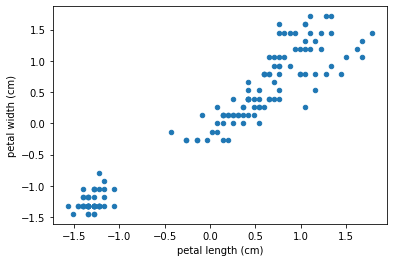

In [27]:
features = ['petal length (cm)','petal width (cm)'] # get features

iris_ftr = iris_df.loc[:, features].values   # feature matrix

iris_target = iris_data.target  # we don't need this in unsupervised learning, we will use it just for visualization

iris_ftr_std = StandardScaler().fit_transform(iris_ftr)  # normalize features matrix

pd.DataFrame(iris_ftr_std, columns=features).plot.scatter('petal length (cm)','petal width (cm)')

In the figure, we can see that we have at least two clusters in the data. Now we will instantiate a KMeans instance. We need to specify the number of clusters we want.

In [28]:
kmeans = KMeans(n_clusters = 3, random_state=1) # we select n_clusters = 3 because we know we have 3 classes in this dataset

kmeans.fit(iris_ftr_std)  # fit only on the feature matrix

KMeans(n_clusters=3, random_state=1)

Text(0, 0.5, 'petal width (cm)')

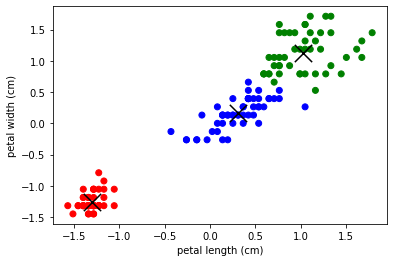

In [29]:
import numpy as np

# after fitting the model on the features matrix, we can get cluster labels and cluster centroids
labels = kmeans.labels_  # get labels
centroids = kmeans.cluster_centers_  # get cluster centroids

# for visualization
kmeans_vis = pd.DataFrame(iris_ftr_std, columns=features)

colormap = np.array(['r', 'g', 'b'])
plt.scatter(kmeans_vis['petal length (cm)'], kmeans_vis['petal width (cm)'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', color = 'k')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

### Principal Component Analysis (PCA)

We may not need all the features in our dataset. Principal Component Analysis (PCA) is a method to smartly reduce the dimensionality of a dataset while losing the least amount of information possible. PCA is an unsupervised learning algorithm.  

In [30]:
from sklearn.decomposition import PCA

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The _**lambda**_ functions are generally used for one-line expressions. Lambda functions are quite useful when we’re working with a lot of iterative code. 

The _**apply()**_ function which is in Pandas is used to apply a function along a row or a column of Pandas DataFrame. In the following code, apply() function calls the lambda function and applies it to target column and returns a modified copy of the target column.

We can use the apply() function to apply the lambda function to both rows and columns of a dataframe. If the axis argument in the apply() function is 0, then the lambda function gets applied to each column, and if 1, then the function gets applied to each row.

The apply() function can also be applied directly to a Pandas series.In this case, it is not needed to indicate axis.

In [31]:
speciesDict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

iris_df.loc[:,'target'] = iris_df.loc[:,'target'].apply(lambda x:speciesDict[x])
#iris_df.loc[:2,'target'] = iris_df.apply(lambda x: x['target']+3 , axis=1) #e.g. if we would want to add a value along a part of the the column

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We need to standardize/scale the features in the data before using PCA. 

In [32]:
features_all = iris_data.feature_names

features_np = iris_df.loc[:, features_all].values
targets_np = iris_df.loc[:, ['target']].values

features_np_std = StandardScaler().fit_transform(features_np) # We only fit on features matrix because PCA is an unsupervised learning algorithm

Now we can apply PCA. The original data is 4 dimensional also it includes 4 features columns. We will convert this 4 dimensional data into 2 dimensional data. Therefore we can select _**n_components**_ variable as 2. If we want to keep for example 90% of the information then we can write n_components = .90, then Scikit-learn will select automatically the minimum number of components to be able to retain this much information.

In [33]:
pca = PCA(n_components = 2)  # instantiate an instance of PCA. we project data from 4D into 2D

principalComponents = pca.fit_transform(features_np_std)

PCA_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

Let's look at the explained variance(information) after PCA projection to 2D. To see how our principal components look like with targets, we concatenate PCA_df with our target column: 

In [34]:
final_df = pd.concat([PCA_df, iris_df[['target']]], axis=1)

final_df.head()

,principal component 1,principal component 2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


The explained variance tells us how much information (variance) can be attributed to each of the principal components. This is important because we lose some of the variance (information) while we convert 4D space to 2D space. 

In [35]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [36]:
sum(pca.explained_variance_ratio_)

0.9581320720000164

Together, the two principal components contain ~96% of the information of the dataset. The first principal component contains roughly 73% of the variance (information) while the second contains ~23%.

PCA helps us to speed up the training process since it can reduce the dimensionality of the dataset. 

### Sckit-learn Pipelines

Machine learning is not always about applying a single machine learning algorithm. For a lot of machine learning algorithms, we may need to apply data processing steps, data transformations and multiple machine learning algorithms. This can lead to a lot of code. We can keep our code organized and as bug free as possible with sckit-learn pipeline. 

Let's chain PCA and logistic regression for image classification using sckit-learn pipelines. The dataset that we will use is a modified version of MNIST dataset. It contains two classes (0 and 1) and 4000 28x28 pixel images total (so the dimensionality is 28x28=784). There are 2000 labeled images for each digit 0 and 1. Features are integer values between 0 and 255.

In [37]:
from sklearn.pipeline import Pipeline # we added other needed libraries before

In [38]:
mnist_df = pd.read_csv('https://drive.google.com/uc?id=1Ev9uo2tUxqQ84E18KidKx6peLTc23SqJ')

print("Shape of the dataset:", mnist_df.shape)

mnist_df.head() # show first 5 rows in Pandas DataFrame

Shape of the dataset: (4000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


The following code chains PCA and Logistic regression together. 

In [39]:
# split data into train and test set
x = mnist_df.loc[:,mnist_df.columns[:-1]].values # get only features columns and convert it to NumPy array
y = mnist_df.loc[:,'label'].values # get only label column and convert it to NumPy array

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0) # split by 75% for train, %25 for test

# standardize the data
scaler = StandardScaler() # instantiate a StandartScaler instance
scaler.fit(x_train) # fit on train set only
x_train_std = scaler.transform(x_train) # apply transform to the train set
x_test_std = scaler.transform(x_test) # apply transform to the test set

# apply PCA
pca_mnist = PCA(n_components = .90, random_state=0)  # instantiate an instance of PCA
pca.fit(x_train_std) # fit on train set
x_train_pca = pca.transform(x_train_std) # transform train set
x_test_pca = pca.transform(x_test_std) # transform test set

# apply Logistic Regression
clf_mnist = LogisticRegression() # instantiate an instance of LogisticRegression
clf_mnist.fit(x_train_pca, y_train)  # train the model

# get model performance
acc = clf_mnist.score(x_test_pca, y_test)  # print the accuracy acc. to test set: correct predictions/total number of data points
print(acc)

0.997


It is long and includes _**fit**_ method three times. So we can shorten it using sckit-learn pipelines. We can name the steps in the pipeline e.g. scaler, pca, logistic etc. Following code is more compact and easy to understand. 

In [40]:
# split data into train and test set
x = mnist_df.loc[:,mnist_df.columns[:-1]].values # get only features columns and convert it to NumPy array
y = mnist_df.loc[:,'label'].values # get only label column and convert it to NumPy array

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0) # split by 75% for train, %25 for test

# create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), 
                ('pca', PCA(n_components=.90, random_state=0)),
                ('logistic', LogisticRegression())])

pipe.fit(x_train, y_train)

# get model performance
acc = pipe.score(x_test, y_test)
print(acc)

0.997


We can also visualize our pipeline. Thus, we can see all steps of our machine learning model.  

In [41]:
from sklearn import set_config

set_config(display = 'diagram')
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9, random_state=0)),
                ('logistic', LogisticRegression())])